<a href="https://colab.research.google.com/github/ramachaitanya0/Score-Predictor/blob/master/intro_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [9]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [11]:
import io
test = pd.read_csv(io.BytesIO(uploaded["test.csv"]))

In [12]:

uploaded = files.upload()

Saving train.csv to train.csv


In [13]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [14]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [15]:
train_or = train.copy()

In [16]:
test_or = test.copy()

In [17]:
for i in (test, train, test_or, train_or) :
  i["Datetime"] = pd.to_datetime(i.Datetime, format = "%d-%m-%Y %H:%M")

In [18]:
for j in (test, train,test_or , train_or) :
  j["year"] = j.Datetime.dt.year
  j["month"] = j.Datetime.dt.month
  j["day"] = j.Datetime.dt.day
  j["hour"] = j.Datetime.dt.hour

In [19]:
train["day_of_week "] = train.Datetime.dt.dayofweek

In [24]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [25]:
t = np.zeros(18288,dtype = int)

In [26]:
for i in range(0 , 18288) :
  if train.loc[i, 'day_of_week '] == 5 or train.loc[i,'day_of_week '] == 6 :
    t[i]= 1
  else:
    t[i]= 0

In [27]:
train["weekend"] = t

In [28]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [29]:
train.drop("ID", axis = 1, inplace = True)

In [31]:
jt = train.copy()

In [32]:
jt.index = jt["Datetime"]

In [33]:
jt.head()

,Datetime,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [34]:
ts = jt["Count"]


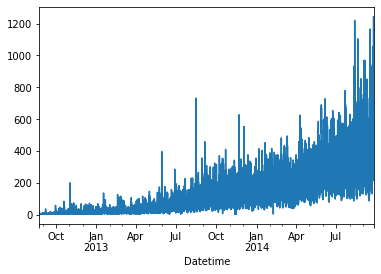

In [37]:
ts.plot()
plt.show()

In [41]:
train_or.head()

,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [46]:
neww = train.groupby("year")

In [48]:
neww.head()

,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
3096,2013-01-01 00:00:00,20,2013,1,1,0,1,0
3097,2013-01-01 01:00:00,44,2013,1,1,1,1,0
3098,2013-01-01 02:00:00,28,2013,1,1,2,1,0
3099,2013-01-01 03:00:00,8,2013,1,1,3,1,0
3100,2013-01-01 04:00:00,14,2013,1,1,4,1,0


In [49]:
neww = neww.mean()

In [50]:
print(neww)

           Count      month        day  hour  day_of_week    weekend
year                                                                
2012   11.282946  10.372093  16.418605  11.5      3.015504  0.294574
2013   78.306849   6.526027  15.720548  11.5      2.994521  0.284932
2014  283.017102   4.944030  15.451493  11.5      2.996269  0.283582


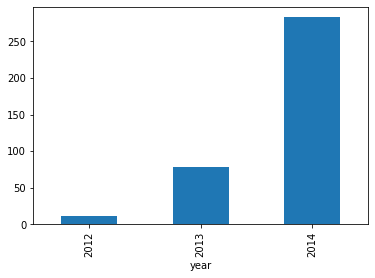

In [55]:
neww["Count"].plot.bar()
plt.show()

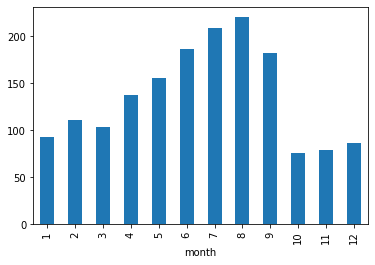

In [59]:
train.groupby("month").mean()["Count"].plot.bar()

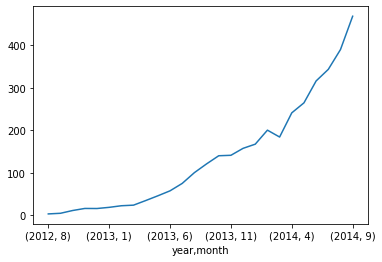

In [61]:
tempp = train.groupby(["year","month"])["Count"].mean()
tempp.plot()

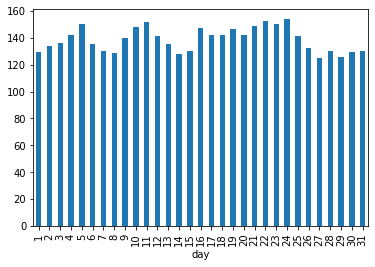

In [63]:
train.groupby("day")["Count"].mean().plot.bar()

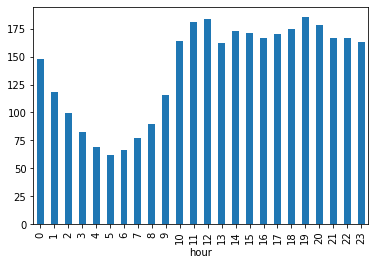

In [64]:
train.groupby("hour")["Count"].mean().plot.bar()

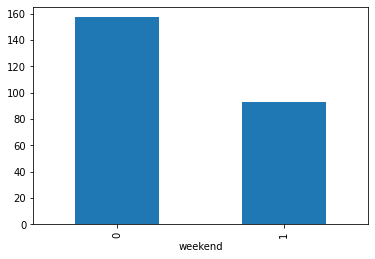

In [65]:
train.groupby("weekend")["Count"].mean().plot.bar()

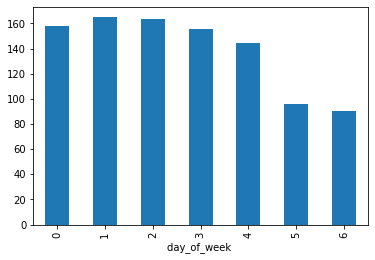

In [67]:
train.groupby("day_of_week ")["Count"].mean().plot.bar()

In [68]:
train.head()

,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [69]:
train.set_index("Datetime",inplace=True)

In [71]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
monthly = train.resample('M').mean()
weekly = train.resample('W').mean()

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714
